In [ ]:
# Project Objective : “To identify distinct market segments based on customer demographics, purchase behavior, 
# and regional preferences for location-specific inventory planning.

In [74]:
import pandas as pd
import numpy as np


In [75]:
df=pd.read_csv("sales_and_customer_insights.csv")
df.size

150000

In [76]:
df.head(3)

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program


In [77]:
df.isna().sum()

Customer_ID                 0
Product_ID                  0
Transaction_ID              0
Purchase_Frequency          0
Average_Order_Value         0
Most_Frequent_Category      0
Time_Between_Purchases      0
Region                      0
Churn_Probability           0
Lifetime_Value              0
Launch_Date                 0
Peak_Sales_Date             0
Season                      0
Preferred_Purchase_Times    0
Retention_Strategy          0
dtype: int64

In [78]:
df.nunique()

Customer_ID                 10000
Product_ID                  10000
Transaction_ID              10000
Purchase_Frequency             19
Average_Order_Value          7608
Most_Frequent_Category          4
Time_Between_Purchases         85
Region                          4
Churn_Probability             101
Lifetime_Value               9957
Launch_Date                  1097
Peak_Sales_Date               365
Season                          4
Preferred_Purchase_Times        3
Retention_Strategy              3
dtype: int64

In [79]:
a=df.columns
a

Index(['Customer_ID', 'Product_ID', 'Transaction_ID', 'Purchase_Frequency',
       'Average_Order_Value', 'Most_Frequent_Category',
       'Time_Between_Purchases', 'Region', 'Churn_Probability',
       'Lifetime_Value', 'Launch_Date', 'Peak_Sales_Date', 'Season',
       'Preferred_Purchase_Times', 'Retention_Strategy'],
      dtype='object')

In [81]:
df.dtypes

Customer_ID                  object
Product_ID                   object
Transaction_ID               object
Purchase_Frequency            int64
Average_Order_Value         float64
Most_Frequent_Category       object
Time_Between_Purchases        int64
Region                       object
Churn_Probability           float64
Lifetime_Value              float64
Launch_Date                  object
Peak_Sales_Date              object
Season                       object
Preferred_Purchase_Times     object
Retention_Strategy           object
dtype: object

In [82]:

features = [
    'Purchase_Frequency', 'Average_Order_Value', 'Time_Between_Purchases',
    'Churn_Probability', 'Lifetime_Value', 'Most_Frequent_Category',
    'Region', 'Season', 'Preferred_Purchase_Times', 'Retention_Strategy'
]



In [83]:
data = df[features].dropna()

In [84]:


categorical_cols = ['Most_Frequent_Category', 'Region', 'Season', 'Preferred_Purchase_Times', 'Retention_Strategy']
data_encoded = pd.get_dummies(data, columns=categorical_cols)
data_encoded.head(2)


,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value,Most_Frequent_Category_Clothing,Most_Frequent_Category_Electronics,Most_Frequent_Category_Home,Most_Frequent_Category_Sports,Region_Asia,...,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Preferred_Purchase_Times_Afternoon,Preferred_Purchase_Times_Evening,Preferred_Purchase_Times_Morning,Retention_Strategy_Discount,Retention_Strategy_Email Campaign,Retention_Strategy_Loyalty Program
0,17,172.57,45,0.98,952.81,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,True
1,10,64.89,6,0.66,5427.51,True,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False


In [85]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Scale numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded)
scaled_data[2]


array([-1.25873762,  0.19913858, -0.96660487,  0.34150758, -0.3619652 ,
       -0.57888987, -0.58766641, -0.57365519,  1.75688266,  1.74508093,
       -0.58458667, -0.57026784, -0.58150724, -0.57765819, -0.56857403,
       -0.58058346,  1.71648767, -0.7103974 ,  1.38307779, -0.68804436,
       -0.69816274, -0.71119429,  1.40451116])

In [86]:

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [87]:

# Elbow Method to find optimal k
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


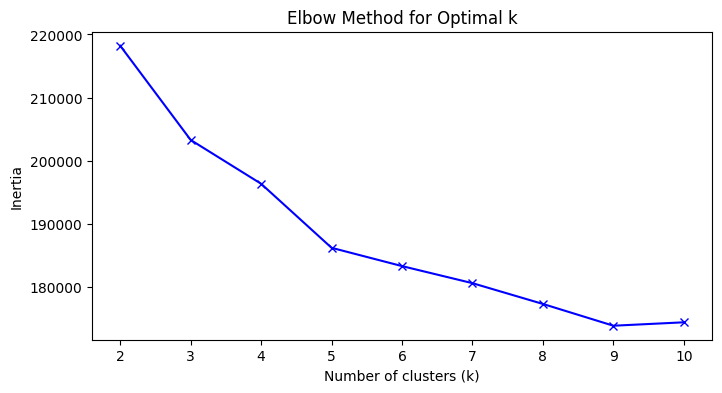

In [88]:

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [102]:





# Apply K-Means with chosen k (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

numeric_cols = ['Purchase_Frequency', 'Average_Order_Value', 'Time_Between_Purchases',
                'Churn_Probability', 'Lifetime_Value']
cluster_profile_numeric = df.groupby('Cluster')[numeric_cols].mean()
print("\nNumeric Profile per Cluster:")
print(cluster_profile_numeric)

# Categorical profile
categorical_cols = ['Most_Frequent_Category', 'Region', 'Season', 'Preferred_Purchase_Times', 'Retention_Strategy']
print("\nCategorical Profile per Cluster:")
for col in categorical_cols:
    mode_per_cluster = df.groupby('Cluster')[col].agg(lambda x: x.value_counts().index[0])
    print(f"\nMost common {col} per cluster:")
    print(mode_per_cluster)




Numeric Profile per Cluster:
         Purchase_Frequency  Average_Order_Value  Time_Between_Purchases  \
Cluster                                                                    
0                  9.951771           109.944647               47.366478   
1                  9.845326           110.668223               46.592756   
2                  9.948136           110.607844               46.139384   
3                 10.029429           109.444379               46.856124   

         Churn_Probability  Lifetime_Value  
Cluster                                     
0                 0.508348     5045.810640  
1                 0.506016     5004.876309  
2                 0.497812     5091.586564  
3                 0.493427     5012.618196  

Categorical Profile per Cluster:

Most common Most_Frequent_Category per cluster:
Cluster
0    Electronics
1           Home
2         Sports
3    Electronics
Name: Most_Frequent_Category, dtype: object

Most common Region per cluster:
Cluster

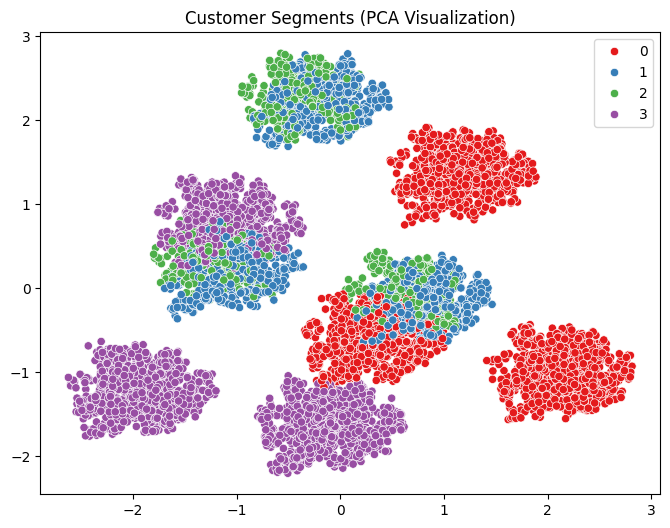

In [103]:

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='Set1')
plt.title('Customer Segments (PCA Visualization)')
plt.show()




In [104]:
import plotly.express as px


pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)


df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]
df['PCA3'] = pca_data[:, 2]


fig = px.scatter_3d(
    df,
    x='PCA1', y='PCA2', z='PCA3',
    color='Cluster',
    hover_data=['Customer_ID', 'Region', 'Most_Frequent_Category'],
    title='3D Visualization of Customer Segments',
    color_continuous_scale='Viridis'
)

fig.update_traces(marker=dict(size=5))
fig.show()
